In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-12,24.389999,30.990000,23.330000,27.360001,27.360001,0.0
2022-02-13,24.389999,30.990000,23.330000,27.360001,27.360001,0.0
2022-02-14,29.170000,32.040001,28.330000,28.330000,28.330000,0.0
2022-02-15,28.090000,28.090000,25.330000,25.700001,25.700001,0.0
2022-02-16,25.190001,27.090000,23.879999,24.290001,24.290001,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-12,4506.270020,4526.330078,4401.410156,4418.640137,4418.640137,4.164960e+09
2022-02-13,4506.270020,4526.330078,4401.410156,4418.640137,4418.640137,4.164960e+09
2022-02-14,4412.609863,4426.220215,4364.839844,4401.669922,4401.669922,3.466170e+09
2022-02-15,4429.279785,4472.770020,4429.279785,4471.069824,4471.069824,3.363200e+09
2022-02-16,4455.750000,4489.549805,4429.680176,4475.009766,4475.009766,2.334610e+09


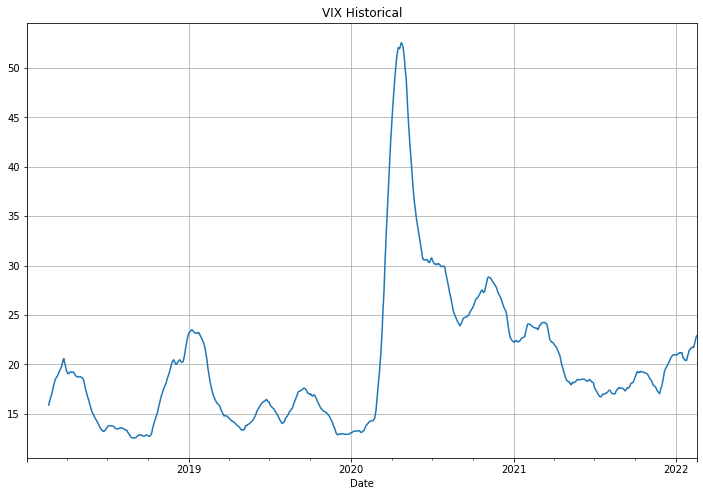

In [4]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

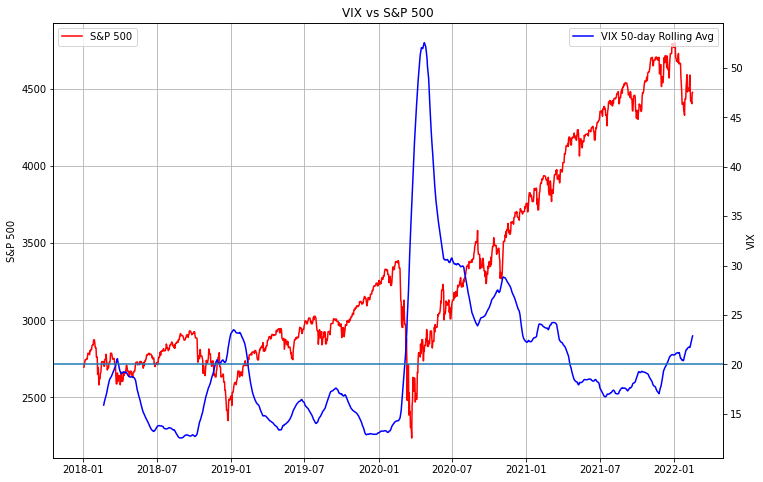

In [8]:
#Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)